R DATA
[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [2340. 2307. 2329. ...    0.    0.    0.]
 [2355. 2343. 2363. ...    0.    0.    0.]
 [2444. 2406. 2364. ...    0.    0.    0.]]
Ha DATA
[[ 135.  145.  142. ...  140.  133.  135.]
 [ 280.  276.  283. ...  546.  286.  135.]
 [ 706.  697.  700. ...  569.  272.  140.]
 ...
 [3434. 3423. 3453. ...  705.  421.  138.]
 [3464. 3478. 3504. ...  702.  423.  133.]
 [3593. 3581. 3495. ...  718.  412.  136.]]
Altered Ha DATA
[[ 135.  145.  142. ...  140.  133.  135.]
 [ 280.  276.  283. ...  546.  286.  135.]
 [ 706.  697.  700. ...  569.  272.  140.]
 ...
 [1094. 1116. 1124. ...  705.  421.  138.]
 [1109. 1135. 1141. ...  702.  423.  133.]
 [1149. 1175. 1131. ...  718.  412.  136.]]


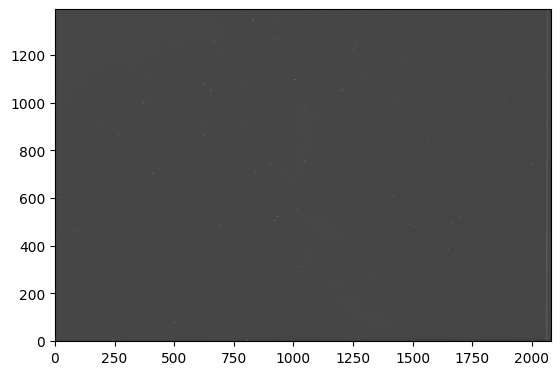

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

hdul1 = fits.open('data/rim_R_wcs.fits')
Rdata = hdul1[0].data
print("R DATA")
print(Rdata)

hdul2 = fits.open('data/rim_Ha_wcs.fits')
Hadata = hdul2[0].data
print("Ha DATA")
print(Hadata)

# hdul3 = fits.open('rim_[SII]_wcs.fits')
# SIIdata = hdul3[0].data
# print(SIIdata)

# print(np.shape(Rdata))
# print(np.shape(Hadata))
# print(np.shape(SIIdata))

newHaData = Hadata

for i in range(0, len(Hadata)):
    for j in range(0, len(Hadata[0])):
        newHaData[i, j] = Hadata[i, j] - Rdata[i, j]

print("Altered Ha DATA")
print(newHaData)

plt.imshow(Hadata, origin = 'lower', cmap = 'gray')

In [ ]:
plt.imshow(Rdata, origin = 'lower', cmap = 'gray')

In [ ]:
plt.imshow(newHaData, origin = 'lower', cmap = 'gray')